<a href="https://colab.research.google.com/github/anushka-code/Jazzaar-MIT/blob/main/Jazzaar_Ent_and_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Synchrony Data of Jazz Rehearsal Videos

In [ ]:
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from scipy.io import wavfile
from scipy.stats import pearsonr
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from sklearn.preprocessing import MinMaxScaler

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
def DataLoader(link, name_of_file):
  id = link.split("/")[-2]
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile(name_of_file)
  dataframe = pd.read_csv(name_of_file)
  return dataframe

link = 'https://drive.google.com/file/d/1kx2RTtKv-nIKFoKM_XY44H3IRAIYFmba/view?usp=sharing'
name = 'output_table.csv"'
df_synchrony = DataLoader(link, name)

In [ ]:
link2 = 'https://drive.google.com/file/d/1BeQjxLWakyNGeljznZ1ysaGACR1YHExg/view?usp=sharing'
name2 = 'jazzflow-erkin.csv'
df_md = DataLoader(link2, name2)

In [ ]:
df_md

,id,__typename,_lastChangedAt,_version,angry,createdAt,disgusted,fearful,happy,meetingID,neutral,owner,sad,score,surprised,timestamp,updatedAt
0,abc8abb8-b81c-4a8a-b390-d895735d809b,AudienceFaceExpression,1646846650995,1,0.374838,2022-03-09T17:24:10.994Z,1.328748e-06,7.488778e-09,0.000996,36bd0c41-77ef-4626-8602-119803ae6e04,0.620870,f6956996-c7bc-4971-a436-f034ccd4facc,0.003284,'-0.3771155880627417,1.132645e-05,1646846650298,2022-03-09T17:24:10.994Z
1,29b9974d-2e63-4c50-84c9-f00a76e18e06,AudienceFaceExpression,1646852661161,1,0.000154,2022-03-09T19:04:21.160Z,5.144679e-05,2.011098e-08,0.819734,36bd0c41-77ef-4626-8602-119803ae6e04,0.178700,f6956996-c7bc-4971-a436-f034ccd4facc,0.001361,0.8181676307008487,2.561990e-07,1646852660297,2022-03-09T19:04:21.160Z
2,4573861a-40b3-4e0f-a1f4-becb3fda76e5,AudienceFaceExpression,1646848991111,1,0.000284,2022-03-09T18:03:11.110Z,1.797050e-07,2.298866e-06,0.001661,36bd0c41-77ef-4626-8602-119803ae6e04,0.742777,f6956996-c7bc-4971-a436-f034ccd4facc,0.254499,'-0.2523486881522605,7.758179e-04,1646848990318,2022-03-09T18:03:11.110Z
3,46142906-fb9b-44ee-8161-b3e524660f5e,AudienceFaceExpression,1646847515015,1,0.147480,2022-03-09T17:38:35.014Z,1.363300e-03,6.096854e-05,0.071268,36bd0c41-77ef-4626-8602-119803ae6e04,0.558289,f6956996-c7bc-4971-a436-f034ccd4facc,0.215395,'-0.28688861581739816,6.143184e-03,1646847514287,2022-03-09T17:38:35.014Z
4,26ee064e-194d-4951-9746-120d065789b5,AudienceFaceExpression,1646854884278,1,0.004335,2022-03-09T19:41:24.278Z,1.516443e-05,5.082845e-06,0.473160,36bd0c41-77ef-4626-8602-119803ae6e04,0.375792,f6956996-c7bc-4971-a436-f034ccd4facc,0.146121,0.3232553771200699,5.714090e-04,1646854883318,2022-03-09T19:41:24.278Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12263,c20a2dd3-3f32-4e00-b4da-a4cb3ef3bf32,AudienceFaceExpression,1646849815046,1,0.003441,2022-03-09T18:16:55.045Z,9.786746e-04,3.493822e-04,0.128995,36bd0c41-77ef-4626-8602-119803ae6e04,0.678071,f6956996-c7bc-4971-a436-f034ccd4facc,0.188034,'-0.06367616578609159,1.317385e-04,1646849814261,2022-03-09T18:16:55.045Z
12264,af303d20-3cf3-48e7-84fb-9d5ed9416e8a,AudienceFaceExpression,1646856489244,1,0.025365,2022-03-09T20:08:09.243Z,1.495152e-03,1.419515e-03,0.214771,36bd0c41-77ef-4626-8602-119803ae6e04,0.388010,f6956996-c7bc-4971-a436-f034ccd4facc,0.080924,0.39358233295206446,2.880152e-01,1646856488288,2022-03-09T20:08:09.243Z
12265,f6f46279-6be4-49e9-9ec1-36ad85d938ec,AudienceFaceExpression,1646855525216,1,0.013979,2022-03-09T19:52:05.215Z,1.704393e-03,3.081495e-06,0.010688,36bd0c41-77ef-4626-8602-119803ae6e04,0.972606,f6956996-c7bc-4971-a436-f034ccd4facc,0.000688,'-0.005355208860351013,3.314306e-04,1646855524273,2022-03-09T19:52:05.215Z
12266,e8095552-5283-4dc3-b526-4a60feec3ccf,AudienceFaceExpression,1646854026188,1,0.014610,2022-03-09T19:27:06.188Z,7.095278e-07,1.349876e-07,0.000235,36bd0c41-77ef-4626-8602-119803ae6e04,0.981630,f6956996-c7bc-4971-a436-f034ccd4facc,0.003524,'-0.017900040513212916,3.373593e-08,1646854025275,2022-03-09T19:27:06.188Z


###FER PrePro

In [ ]:
def FERPrePro(ferdata):
  df_emo = ferdata.sort_values(by='createdAt', ascending=True)
  df_emo['createdAt'] = pd.to_datetime(df_emo['createdAt'])
  df_emo = df_emo.drop(['id', '__typename', '_lastChangedAt', '_version', 'meetingID', 'owner', 'score', 'timestamp', 'updatedAt'], axis = 1)
  df_fer_rehearsal = df_emo[(df_emo['createdAt'] >= '2022-03-09 17:54:00') & (df_emo['createdAt'] <= '2022-03-09 19:29:01')]
  df_fer_rehearsal['createdAt'] = df_fer_rehearsal['createdAt'].map(lambda x: x.replace(microsecond=0))
  df_fer_rehearsal = df_fer_rehearsal.set_index('createdAt')
  newindex = df_fer_rehearsal.index.astype('datetime64[ns]')
  df_fer_rehearsal.index = newindex
  df_fer_rehearsal.index.names = ['timestamp']
  return df_fer_rehearsal

ferprepro = FERPrePro(df_md)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  


In [ ]:
def FERInterpolation(fer_preprocessed_data):
  downsample = fer_preprocessed_data.resample('60S').mean()
  downsample_duplicate = downsample
  upsample = downsample_duplicate.resample('S').mean()
  emotions_jazz_rehearsal = upsample.interpolate(method ='polynomial', order=3)
  return emotions_jazz_rehearsal

fer_jazz_rehearsal = FERInterpolation(ferprepro)

In [ ]:
fer_jazz_rehearsal

,angry,disgusted,fearful,happy,neutral,sad,surprised
timestamp,,,,,,,
2022-03-09 17:54:00,0.031690,0.007861,0.001224,0.161196,0.669013,0.107403,0.021614
2022-03-09 17:54:01,0.030208,0.007650,0.001160,0.158084,0.670880,0.111295,0.020722
2022-03-09 17:54:02,0.028814,0.007443,0.001099,0.155117,0.672589,0.115074,0.019863
2022-03-09 17:54:03,0.027505,0.007242,0.001040,0.152293,0.674142,0.118742,0.019037
2022-03-09 17:54:04,0.026280,0.007045,0.000983,0.149608,0.675542,0.122299,0.018243
...,...,...,...,...,...,...,...
2022-03-09 19:28:56,0.131127,0.000290,0.004433,0.027915,0.769254,0.062621,0.004359
2022-03-09 19:28:57,0.134078,0.000231,0.003414,0.021718,0.775200,0.061969,0.003390
2022-03-09 19:28:58,0.137102,0.000170,0.002362,0.015321,0.781385,0.061272,0.002388


In [ ]:
fer_jazz_rehearsal = fer_jazz_rehearsal['2022-03-09 17:54:03':'2022-03-09 19:26:30']

In [ ]:
fer_jazz_rehearsal

,angry,disgusted,fearful,happy,neutral,sad,surprised
timestamp,,,,,,,
2022-03-09 17:54:03,0.027505,0.007242,0.001040,0.152293,0.674142,0.118742,0.019037
2022-03-09 17:54:04,0.026280,0.007045,0.000983,0.149608,0.675542,0.122299,0.018243
2022-03-09 17:54:05,0.025138,0.006853,0.000929,0.147061,0.676792,0.125747,0.017480
2022-03-09 17:54:06,0.024077,0.006665,0.000878,0.144649,0.677895,0.129086,0.016749
2022-03-09 17:54:07,0.023097,0.006482,0.000829,0.142371,0.678852,0.132320,0.016048
...,...,...,...,...,...,...,...
2022-03-09 19:26:26,0.057745,0.000319,-0.000540,0.008023,0.857313,0.072633,0.004506
2022-03-09 19:26:27,0.058333,0.000310,-0.000625,0.007131,0.859051,0.071518,0.004282
2022-03-09 19:26:28,0.058910,0.000300,-0.000707,0.006293,0.860757,0.070388,0.004059


###Synchrony

In [ ]:
df_synchrony

,synchrony_neck_to_r_sho,synchrony_neck_to_l_sho,synchrony_r_sho_to_r_elb,synchrony_r_elb_to_r_wri,synchrony_l_sho_to_l_elb,synchrony_l_elb_to_l_wri,synchrony_neck_to_r_hip,synchrony_r_hip_to_r_knee,synchrony_r_knee_to_r_ank,synchrony_neck_to_l_hip,synchrony_l_hip_to_l_knee,synchrony_l_knee_to_l_ank,synchrony_neck_to_nose,synchrony_nose_to_r_eye,synchrony_r_eye_to_r_ear,synchrony_nose_to_l_eye,synchrony_l_eye_to_l_ear,normalized_distance
0,0.943854,0.914264,0.954129,1.000000,0.976621,-1.000000,0.971418,-1.000000,-1.0,0.874547,0.996005,-1.0,0.970074,0.921694,0.953796,0.975730,-1.000000,-1.0
1,0.969001,0.988330,0.955645,0.993868,0.959051,0.978874,0.914044,0.995415,-1.0,0.877402,1.000000,-1.0,0.966145,0.909061,0.937747,0.982436,-1.000000,-1.0
2,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,0.970566,1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
3,0.975972,0.980902,0.951230,0.996188,0.980610,-1.000000,0.914046,0.998583,-1.0,0.899251,1.000000,-1.0,0.978766,0.896770,0.862376,0.962542,-1.000000,-1.0
4,0.990282,-1.000000,0.940375,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6103,0.961219,0.984302,1.000000,-1.000000,-1.000000,-1.000000,0.987381,-1.000000,-1.0,0.986496,-1.000000,-1.0,0.965810,0.938108,0.963244,0.976716,-1.000000,-1.0
6104,0.899081,0.924445,0.998860,-1.000000,0.995386,-1.000000,0.912557,1.000000,-1.0,0.991784,-1.000000,-1.0,0.962332,0.952354,0.953971,0.942982,0.992095,-1.0
6105,0.896753,0.855362,1.000000,-1.000000,0.998153,-1.000000,0.982877,-1.000000,-1.0,0.992808,-1.000000,-1.0,0.927857,0.938908,0.960168,0.932304,0.953457,-1.0
6106,0.877614,0.911987,0.990915,-1.000000,0.991630,-1.000000,0.909751,0.991962,-1.0,0.891543,1.000000,-1.0,0.919755,0.894325,0.981621,0.936595,0.915895,-1.0


In [ ]:
series = pd.date_range(start='2022-03-09 17:45:00', end='2022-03-09 19:26:47', freq='S')
df_synchrony['timestamp'] = series
df_synchrony.set_index("timestamp", inplace = True)

In [ ]:
df_synchrony

,synchrony_neck_to_r_sho,synchrony_neck_to_l_sho,synchrony_r_sho_to_r_elb,synchrony_r_elb_to_r_wri,synchrony_l_sho_to_l_elb,synchrony_l_elb_to_l_wri,synchrony_neck_to_r_hip,synchrony_r_hip_to_r_knee,synchrony_r_knee_to_r_ank,synchrony_neck_to_l_hip,synchrony_l_hip_to_l_knee,synchrony_l_knee_to_l_ank,synchrony_neck_to_nose,synchrony_nose_to_r_eye,synchrony_r_eye_to_r_ear,synchrony_nose_to_l_eye,synchrony_l_eye_to_l_ear,normalized_distance
timestamp,,,,,,,,,,,,,,,,,,
2022-03-09 17:45:00,0.943854,0.914264,0.954129,1.000000,0.976621,-1.000000,0.971418,-1.000000,-1.0,0.874547,0.996005,-1.0,0.970074,0.921694,0.953796,0.975730,-1.000000,-1.0
2022-03-09 17:45:01,0.969001,0.988330,0.955645,0.993868,0.959051,0.978874,0.914044,0.995415,-1.0,0.877402,1.000000,-1.0,0.966145,0.909061,0.937747,0.982436,-1.000000,-1.0
2022-03-09 17:45:02,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,0.970566,1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
2022-03-09 17:45:03,0.975972,0.980902,0.951230,0.996188,0.980610,-1.000000,0.914046,0.998583,-1.0,0.899251,1.000000,-1.0,0.978766,0.896770,0.862376,0.962542,-1.000000,-1.0
2022-03-09 17:45:04,0.990282,-1.000000,0.940375,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-09 19:26:43,0.961219,0.984302,1.000000,-1.000000,-1.000000,-1.000000,0.987381,-1.000000,-1.0,0.986496,-1.000000,-1.0,0.965810,0.938108,0.963244,0.976716,-1.000000,-1.0
2022-03-09 19:26:44,0.899081,0.924445,0.998860,-1.000000,0.995386,-1.000000,0.912557,1.000000,-1.0,0.991784,-1.000000,-1.0,0.962332,0.952354,0.953971,0.942982,0.992095,-1.0
2022-03-09 19:26:45,0.896753,0.855362,1.000000,-1.000000,0.998153,-1.000000,0.982877,-1.000000,-1.0,0.992808,-1.000000,-1.0,0.927857,0.938908,0.960168,0.932304,0.953457,-1.0


In [ ]:
entangle = df_synchrony.replace(-1,np.NaN)
downsample = entangle.resample('30S').mean()
downsample_dup = downsample
resample = downsample_dup.resample('S').mean()
resample_sync = resample.interpolate(method ='polynomial', order=3)

In [ ]:
resample_sync

,synchrony_neck_to_r_sho,synchrony_neck_to_l_sho,synchrony_r_sho_to_r_elb,synchrony_r_elb_to_r_wri,synchrony_l_sho_to_l_elb,synchrony_l_elb_to_l_wri,synchrony_neck_to_r_hip,synchrony_r_hip_to_r_knee,synchrony_r_knee_to_r_ank,synchrony_neck_to_l_hip,synchrony_l_hip_to_l_knee,synchrony_l_knee_to_l_ank,synchrony_neck_to_nose,synchrony_nose_to_r_eye,synchrony_r_eye_to_r_ear,synchrony_nose_to_l_eye,synchrony_l_eye_to_l_ear,normalized_distance
timestamp,,,,,,,,,,,,,,,,,,
2022-03-09 17:45:00,0.944763,0.933218,0.957413,0.994980,0.969122,0.988104,0.936819,0.993486,0.995077,0.933964,0.996976,NaN,0.960182,0.945655,0.940208,0.957697,0.968681,NaN
2022-03-09 17:45:01,0.936837,0.925358,0.955403,0.994426,0.966138,0.984759,0.935124,0.992939,0.948618,0.931499,0.996036,NaN,0.958663,0.943664,0.941882,0.955501,0.967029,NaN
2022-03-09 17:45:02,0.929425,0.918017,0.953496,0.993914,0.963338,0.981624,0.933474,0.992427,0.903157,0.929152,0.995154,NaN,0.957236,0.941786,0.943465,0.953448,0.965533,NaN
2022-03-09 17:45:03,0.922516,0.911182,0.951692,0.993445,0.960718,0.978694,0.931870,0.991948,0.858687,0.926923,0.994328,NaN,0.955900,0.940017,0.944958,0.951535,0.964189,NaN
2022-03-09 17:45:04,0.916099,0.904842,0.949988,0.993016,0.958274,0.975965,0.930312,0.991503,0.815200,0.924808,0.993557,NaN,0.954652,0.938355,0.946366,0.949760,0.962991,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-09 19:26:26,0.914767,0.940724,0.986272,0.998260,0.984767,0.995175,0.956048,0.993380,NaN,0.956950,0.995324,NaN,0.953201,0.938976,0.952760,0.945152,0.974912,NaN
2022-03-09 19:26:27,0.914322,0.939972,0.985635,0.998042,0.985581,0.993757,0.955893,0.993983,NaN,0.955976,0.996219,NaN,0.953377,0.937905,0.952645,0.944193,0.974141,NaN
2022-03-09 19:26:28,0.913833,0.939210,0.984961,0.997802,0.986470,0.992218,0.955800,0.994610,NaN,0.955010,0.997147,NaN,0.953581,0.936741,0.952493,0.943161,0.973315,NaN


In [ ]:
entangleTable = resample_sync.fillna(method = 'bfill')
entangleTable = entangleTable.fillna(method = 'ffill')
entangleTable 

,synchrony_neck_to_r_sho,synchrony_neck_to_l_sho,synchrony_r_sho_to_r_elb,synchrony_r_elb_to_r_wri,synchrony_l_sho_to_l_elb,synchrony_l_elb_to_l_wri,synchrony_neck_to_r_hip,synchrony_r_hip_to_r_knee,synchrony_r_knee_to_r_ank,synchrony_neck_to_l_hip,synchrony_l_hip_to_l_knee,synchrony_l_knee_to_l_ank,synchrony_neck_to_nose,synchrony_nose_to_r_eye,synchrony_r_eye_to_r_ear,synchrony_nose_to_l_eye,synchrony_l_eye_to_l_ear,normalized_distance
timestamp,,,,,,,,,,,,,,,,,,
2022-03-09 17:45:00,0.944763,0.933218,0.957413,0.994980,0.969122,0.988104,0.936819,0.993486,0.995077,0.933964,0.996976,0.934406,0.960182,0.945655,0.940208,0.957697,0.968681,0.779238
2022-03-09 17:45:01,0.936837,0.925358,0.955403,0.994426,0.966138,0.984759,0.935124,0.992939,0.948618,0.931499,0.996036,0.934406,0.958663,0.943664,0.941882,0.955501,0.967029,0.779238
2022-03-09 17:45:02,0.929425,0.918017,0.953496,0.993914,0.963338,0.981624,0.933474,0.992427,0.903157,0.929152,0.995154,0.934406,0.957236,0.941786,0.943465,0.953448,0.965533,0.779238
2022-03-09 17:45:03,0.922516,0.911182,0.951692,0.993445,0.960718,0.978694,0.931870,0.991948,0.858687,0.926923,0.994328,0.934406,0.955900,0.940017,0.944958,0.951535,0.964189,0.779238
2022-03-09 17:45:04,0.916099,0.904842,0.949988,0.993016,0.958274,0.975965,0.930312,0.991503,0.815200,0.924808,0.993557,0.934406,0.954652,0.938355,0.946366,0.949760,0.962991,0.779238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-09 19:26:26,0.914767,0.940724,0.986272,0.998260,0.984767,0.995175,0.956048,0.993380,1.000000,0.956950,0.995324,0.999623,0.953201,0.938976,0.952760,0.945152,0.974912,0.378577
2022-03-09 19:26:27,0.914322,0.939972,0.985635,0.998042,0.985581,0.993757,0.955893,0.993983,1.000000,0.955976,0.996219,0.999623,0.953377,0.937905,0.952645,0.944193,0.974141,0.378577
2022-03-09 19:26:28,0.913833,0.939210,0.984961,0.997802,0.986470,0.992218,0.955800,0.994610,1.000000,0.955010,0.997147,0.999623,0.953581,0.936741,0.952493,0.943161,0.973315,0.378577


In [ ]:
entangleTable = entangleTable['2022-03-09 17:54:03':'2022-03-09 19:26:30']

In [ ]:
entangleTable

,synchrony_neck_to_r_sho,synchrony_neck_to_l_sho,synchrony_r_sho_to_r_elb,synchrony_r_elb_to_r_wri,synchrony_l_sho_to_l_elb,synchrony_l_elb_to_l_wri,synchrony_neck_to_r_hip,synchrony_r_hip_to_r_knee,synchrony_r_knee_to_r_ank,synchrony_neck_to_l_hip,synchrony_l_hip_to_l_knee,synchrony_l_knee_to_l_ank,synchrony_neck_to_nose,synchrony_nose_to_r_eye,synchrony_r_eye_to_r_ear,synchrony_nose_to_l_eye,synchrony_l_eye_to_l_ear,normalized_distance
timestamp,,,,,,,,,,,,,,,,,,
2022-03-09 17:54:03,0.908156,0.900970,0.973463,0.969031,0.973907,0.961955,0.963214,0.997247,1.113395,0.976012,0.955237,1.124377,0.945711,0.943964,0.956728,0.934005,0.937081,0.245476
2022-03-09 17:54:04,0.908106,0.901599,0.973929,0.969636,0.974967,0.961886,0.964309,0.997063,1.109887,0.976778,0.954378,1.123417,0.946035,0.943575,0.957048,0.934237,0.936974,0.245550
2022-03-09 17:54:05,0.907991,0.902242,0.974451,0.970257,0.976043,0.961868,0.965436,0.996853,1.106425,0.977551,0.953499,1.122440,0.946444,0.943169,0.957380,0.934454,0.937008,0.245626
2022-03-09 17:54:06,0.907818,0.902898,0.975023,0.970894,0.977130,0.961898,0.966589,0.996619,1.103008,0.978329,0.952606,1.121446,0.946932,0.942748,0.957722,0.934657,0.937174,0.245704
2022-03-09 17:54:07,0.907594,0.903568,0.975640,0.971545,0.978224,0.961974,0.967764,0.996361,1.099637,0.979110,0.951704,1.120434,0.947491,0.942315,0.958074,0.934844,0.937463,0.245785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-09 19:26:26,0.914767,0.940724,0.986272,0.998260,0.984767,0.995175,0.956048,0.993380,1.000000,0.956950,0.995324,0.999623,0.953201,0.938976,0.952760,0.945152,0.974912,0.378577
2022-03-09 19:26:27,0.914322,0.939972,0.985635,0.998042,0.985581,0.993757,0.955893,0.993983,1.000000,0.955976,0.996219,0.999623,0.953377,0.937905,0.952645,0.944193,0.974141,0.378577
2022-03-09 19:26:28,0.913833,0.939210,0.984961,0.997802,0.986470,0.992218,0.955800,0.994610,1.000000,0.955010,0.997147,0.999623,0.953581,0.936741,0.952493,0.943161,0.973315,0.378577


In [ ]:
def getValues(column):
    data= column.describe()
    df=pd.DataFrame(data)
    return df
    
t1 = getValues(entangleTable["synchrony_neck_to_r_sho"]) 
t1
#finalTable = t1[['mean']]
#finalTable 

,synchrony_neck_to_r_sho
count,5548.000000
mean,0.900280
std,0.076110
min,0.362182
25%,0.897825
50%,0.914050
75%,0.933045
max,0.984487


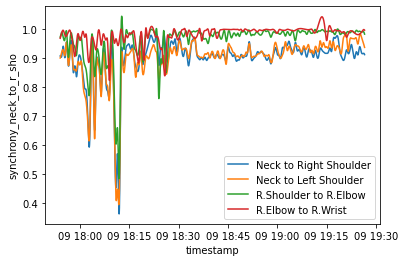

In [ ]:
sns.lineplot(x="timestamp", y="synchrony_neck_to_r_sho", data=entangleTable, label = "Neck to Right Shoulder")
sns.lineplot(x="timestamp", y="synchrony_neck_to_l_sho", data=entangleTable, label = "Neck to Left Shoulder")
sns.lineplot(x="timestamp", y="synchrony_r_sho_to_r_elb", data=entangleTable, label = "R.Shoulder to R.Elbow")
sns.lineplot(x="timestamp", y="synchrony_r_elb_to_r_wri", data=entangleTable, label = "R.Elbow to R.Wrist")

plt.show()

### Group Synchrony X Group Emotions

In [ ]:
jazz_fer_ent = pd.merge_asof(entangleTable, fer_jazz_rehearsal, on='timestamp')

In [ ]:
jazz_fer_ent

,timestamp,synchrony_neck_to_r_sho,synchrony_neck_to_l_sho,synchrony_r_sho_to_r_elb,synchrony_r_elb_to_r_wri,synchrony_l_sho_to_l_elb,synchrony_l_elb_to_l_wri,synchrony_neck_to_r_hip,synchrony_r_hip_to_r_knee,synchrony_r_knee_to_r_ank,...,synchrony_nose_to_l_eye,synchrony_l_eye_to_l_ear,normalized_distance,angry,disgusted,fearful,happy,neutral,sad,surprised
0,2022-03-09 17:54:03,0.908156,0.900970,0.973463,0.969031,0.973907,0.961955,0.963214,0.997247,1.113395,...,0.934005,0.937081,0.245476,0.027505,0.007242,0.001040,0.152293,0.674142,0.118742,0.019037
1,2022-03-09 17:54:04,0.908106,0.901599,0.973929,0.969636,0.974967,0.961886,0.964309,0.997063,1.109887,...,0.934237,0.936974,0.245550,0.026280,0.007045,0.000983,0.149608,0.675542,0.122299,0.018243
2,2022-03-09 17:54:05,0.907991,0.902242,0.974451,0.970257,0.976043,0.961868,0.965436,0.996853,1.106425,...,0.934454,0.937008,0.245626,0.025138,0.006853,0.000929,0.147061,0.676792,0.125747,0.017480
3,2022-03-09 17:54:06,0.907818,0.902898,0.975023,0.970894,0.977130,0.961898,0.966589,0.996619,1.103008,...,0.934657,0.937174,0.245704,0.024077,0.006665,0.000878,0.144649,0.677895,0.129086,0.016749
4,2022-03-09 17:54:07,0.907594,0.903568,0.975640,0.971545,0.978224,0.961974,0.967764,0.996361,1.099637,...,0.934844,0.937463,0.245785,0.023097,0.006482,0.000829,0.142371,0.678852,0.132320,0.016048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5543,2022-03-09 19:26:26,0.914767,0.940724,0.986272,0.998260,0.984767,0.995175,0.956048,0.993380,1.000000,...,0.945152,0.974912,0.378577,0.057745,0.000319,-0.000540,0.008023,0.857313,0.072633,0.004506
5544,2022-03-09 19:26:27,0.914322,0.939972,0.985635,0.998042,0.985581,0.993757,0.955893,0.993983,1.000000,...,0.944193,0.974141,0.378577,0.058333,0.000310,-0.000625,0.007131,0.859051,0.071518,0.004282
5545,2022-03-09 19:26:28,0.913833,0.939210,0.984961,0.997802,0.986470,0.992218,0.955800,0.994610,1.000000,...,0.943161,0.973315,0.378577,0.058910,0.000300,-0.000707,0.006293,0.860757,0.070388,0.004059
5546,2022-03-09 19:26:29,0.913298,0.938437,0.984246,0.997538,0.987435,0.990555,0.955772,0.995260,1.000000,...,0.942054,0.972432,0.378577,0.059475,0.000290,-0.000786,0.005509,0.862428,0.069245,0.003838


In [ ]:
jazz_fer_ent.columns

Index(['timestamp', 'synchrony_neck_to_r_sho', 'synchrony_neck_to_l_sho',
       'synchrony_r_sho_to_r_elb', 'synchrony_r_elb_to_r_wri',
       'synchrony_l_sho_to_l_elb', 'synchrony_l_elb_to_l_wri',
       'synchrony_neck_to_r_hip', 'synchrony_r_hip_to_r_knee',
       'synchrony_r_knee_to_r_ank', 'synchrony_neck_to_l_hip',
       'synchrony_l_hip_to_l_knee', 'synchrony_l_knee_to_l_ank',
       'synchrony_neck_to_nose', 'synchrony_nose_to_r_eye',
       'synchrony_r_eye_to_r_ear', 'synchrony_nose_to_l_eye',
       'synchrony_l_eye_to_l_ear', 'normalized_distance', 'angry', 'disgusted',
       'fearful', 'happy', 'neutral', 'sad', 'surprised'],
      dtype='object')

In [ ]:
jazz_fer_ent['synchrony_neck_to_r_sho'] = MinMaxScaler().fit_transform(np.array(jazz_fer_ent['synchrony_neck_to_r_sho']).reshape(-1,1))
jazz_fer_ent['synchrony_neck_to_l_sho'] = MinMaxScaler().fit_transform(np.array(jazz_fer_ent['synchrony_neck_to_l_sho']).reshape(-1,1))
jazz_fer_ent['synchrony_r_sho_to_r_elb'] = MinMaxScaler().fit_transform(np.array(jazz_fer_ent['synchrony_r_sho_to_r_elb']).reshape(-1,1))
jazz_fer_ent['synchrony_r_elb_to_r_wri'] = MinMaxScaler().fit_transform(np.array(jazz_fer_ent['synchrony_r_elb_to_r_wri']).reshape(-1,1))
jazz_fer_ent['synchrony_l_sho_to_l_elb'] = MinMaxScaler().fit_transform(np.array(jazz_fer_ent['synchrony_l_sho_to_l_elb']).reshape(-1,1))
jazz_fer_ent['synchrony_l_elb_to_l_wri'] = MinMaxScaler().fit_transform(np.array(jazz_fer_ent['synchrony_l_elb_to_l_wri']).reshape(-1,1))
jazz_fer_ent['synchrony_neck_to_r_hip'] = MinMaxScaler().fit_transform(np.array(jazz_fer_ent['synchrony_neck_to_r_hip']).reshape(-1,1))
jazz_fer_ent['synchrony_r_hip_to_r_knee'] = MinMaxScaler().fit_transform(np.array(jazz_fer_ent['synchrony_r_hip_to_r_knee']).reshape(-1,1))
jazz_fer_ent['synchrony_r_knee_to_r_ank'] = MinMaxScaler().fit_transform(np.array(jazz_fer_ent['synchrony_r_knee_to_r_ank']).reshape(-1,1))
jazz_fer_ent['synchrony_neck_to_l_hip'] = MinMaxScaler().fit_transform(np.array(jazz_fer_ent['synchrony_neck_to_l_hip']).reshape(-1,1))
jazz_fer_ent['synchrony_l_hip_to_l_knee'] = MinMaxScaler().fit_transform(np.array(jazz_fer_ent['synchrony_l_hip_to_l_knee']).reshape(-1,1))
jazz_fer_ent['synchrony_l_knee_to_l_ank'] = MinMaxScaler().fit_transform(np.array(jazz_fer_ent['synchrony_l_knee_to_l_ank']).reshape(-1,1))
jazz_fer_ent['synchrony_neck_to_nose'] = MinMaxScaler().fit_transform(np.array(jazz_fer_ent['synchrony_neck_to_nose']).reshape(-1,1))
jazz_fer_ent['synchrony_nose_to_r_eye'] = MinMaxScaler().fit_transform(np.array(jazz_fer_ent['synchrony_nose_to_r_eye']).reshape(-1,1))
jazz_fer_ent['synchrony_r_eye_to_r_ear'] = MinMaxScaler().fit_transform(np.array(jazz_fer_ent['synchrony_r_eye_to_r_ear']).reshape(-1,1))
jazz_fer_ent['synchrony_nose_to_l_eye'] = MinMaxScaler().fit_transform(np.array(jazz_fer_ent['synchrony_nose_to_l_eye']).reshape(-1,1))
jazz_fer_ent['synchrony_l_eye_to_l_ear'] = MinMaxScaler().fit_transform(np.array(jazz_fer_ent['synchrony_l_eye_to_l_ear']).reshape(-1,1))
jazz_fer_ent['normalized_distance'] = MinMaxScaler().fit_transform(np.array(jazz_fer_ent['normalized_distance']).reshape(-1,1))

In [ ]:
jazz_fer_ent

,timestamp,synchrony_neck_to_r_sho,synchrony_neck_to_l_sho,synchrony_r_sho_to_r_elb,synchrony_r_elb_to_r_wri,synchrony_l_sho_to_l_elb,synchrony_l_elb_to_l_wri,synchrony_neck_to_r_hip,synchrony_r_hip_to_r_knee,synchrony_r_knee_to_r_ank,...,synchrony_nose_to_l_eye,synchrony_l_eye_to_l_ear,normalized_distance,angry,disgusted,fearful,happy,neutral,sad,surprised
0,2022-03-09 17:54:03,0.877340,0.853057,0.871981,0.662046,0.954243,0.861182,0.946395,0.895180,0.150769,...,0.908625,0.874075,0.000000,0.027505,0.007242,0.001040,0.152293,0.674142,0.118742,0.019037
1,2022-03-09 17:54:04,0.877261,0.854115,0.872812,0.664794,0.956122,0.860955,0.948301,0.894683,0.150166,...,0.909072,0.873844,0.000449,0.026280,0.007045,0.000983,0.149608,0.675542,0.122299,0.018243
2,2022-03-09 17:54:05,0.877076,0.855197,0.873742,0.667617,0.958027,0.860894,0.950260,0.894117,0.149572,...,0.909490,0.873918,0.000911,0.025138,0.006853,0.000929,0.147061,0.676792,0.125747,0.017480
3,2022-03-09 17:54:06,0.876797,0.856302,0.874762,0.670510,0.959952,0.860992,0.952266,0.893484,0.148984,...,0.909879,0.874275,0.001388,0.024077,0.006665,0.000878,0.144649,0.677895,0.129086,0.016749
4,2022-03-09 17:54:07,0.876439,0.857428,0.875862,0.673467,0.961890,0.861244,0.954310,0.892789,0.148405,...,0.910241,0.874894,0.001879,0.023097,0.006482,0.000829,0.142371,0.678852,0.132320,0.016048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5543,2022-03-09 19:26:26,0.887965,0.919958,0.894809,0.794823,0.973478,0.970730,0.933932,0.884747,0.131288,...,0.930092,0.955308,0.808639,0.057745,0.000319,-0.000540,0.008023,0.857313,0.072633,0.004506
5544,2022-03-09 19:26:27,0.887249,0.918692,0.893675,0.793834,0.974920,0.966056,0.933662,0.886374,0.131288,...,0.928244,0.953653,0.808639,0.058333,0.000310,-0.000625,0.007131,0.859051,0.071518,0.004282
5545,2022-03-09 19:26:28,0.886463,0.917409,0.892472,0.792741,0.976493,0.960981,0.933500,0.888064,0.131288,...,0.926256,0.951880,0.808639,0.058910,0.000300,-0.000707,0.006293,0.860757,0.070388,0.004059
5546,2022-03-09 19:26:29,0.885603,0.916109,0.891198,0.791543,0.978203,0.955495,0.933452,0.889817,0.131288,...,0.924125,0.949984,0.808639,0.059475,0.000290,-0.000786,0.005509,0.862428,0.069245,0.003838


In [ ]:
jazz_fer_ent.corr()

,synchrony_neck_to_r_sho,synchrony_neck_to_l_sho,synchrony_r_sho_to_r_elb,synchrony_r_elb_to_r_wri,synchrony_l_sho_to_l_elb,synchrony_l_elb_to_l_wri,synchrony_neck_to_r_hip,synchrony_r_hip_to_r_knee,synchrony_r_knee_to_r_ank,synchrony_neck_to_l_hip,...,synchrony_nose_to_l_eye,synchrony_l_eye_to_l_ear,normalized_distance,angry,disgusted,fearful,happy,neutral,sad,surprised
synchrony_neck_to_r_sho,1.000000,0.945380,0.901371,0.356791,0.930446,0.826405,0.950877,0.825116,0.205065,0.930941,...,0.887492,0.900855,-0.063018,-0.062212,-0.252136,-0.172762,-0.009182,0.091637,-0.132720,-0.196224
synchrony_neck_to_l_sho,0.945380,1.000000,0.935285,0.448830,0.958296,0.861928,0.966988,0.856284,0.240262,0.965423,...,0.888777,0.923419,0.039726,-0.099217,-0.378627,-0.258266,-0.065066,0.162199,-0.253533,-0.305443
synchrony_r_sho_to_r_elb,0.901371,0.935285,1.000000,0.475778,0.930915,0.874496,0.917952,0.830009,0.282290,0.926487,...,0.922850,0.928752,0.108679,-0.151632,-0.361293,-0.274994,-0.008782,0.206345,-0.283815,-0.365628
synchrony_r_elb_to_r_wri,0.356791,0.448830,0.475778,1.000000,0.402509,0.575780,0.405893,0.619336,0.391486,0.418310,...,0.439597,0.469457,0.282244,-0.227160,-0.409841,-0.314602,-0.065082,0.295965,-0.350636,-0.436495
synchrony_l_sho_to_l_elb,0.930446,0.958296,0.930915,0.402509,1.000000,0.857324,0.962333,0.796874,0.211780,0.976025,...,0.882632,0.903710,0.021606,-0.187143,-0.409187,-0.278968,-0.008443,0.235954,-0.281619,-0.357293
synchrony_l_elb_to_l_wri,0.826405,0.861928,0.874496,0.575780,0.857324,1.000000,0.840183,0.824779,0.330216,0.850496,...,0.862609,0.874408,0.129725,-0.168860,-0.413915,-0.312050,-0.011705,0.223920,-0.294107,-0.355236
synchrony_neck_to_r_hip,0.950877,0.966988,0.917952,0.405893,0.962333,0.840183,1.000000,0.834927,0.231085,0.981810,...,0.874664,0.906146,0.002339,-0.134346,-0.396098,-0.251419,-0.028513,0.186044,-0.250628,-0.314042
synchrony_r_hip_to_r_knee,0.825116,0.856284,0.830009,0.619336,0.796874,0.824779,0.834927,1.000000,0.328556,0.798886,...,0.839625,0.853927,0.103614,-0.141382,-0.353331,-0.335225,0.004202,0.191859,-0.269545,-0.323059
synchrony_r_knee_to_r_ank,0.205065,0.240262,0.282290,0.391486,0.211780,0.330216,0.231085,0.328556,1.000000,0.208258,...,0.247555,0.339508,0.412436,-0.039279,-0.508423,-0.265402,-0.084905,0.130555,-0.310259,-0.405312
synchrony_neck_to_l_hip,0.930941,0.965423,0.926487,0.418310,0.976025,0.850496,0.981810,0.798886,0.208258,1.000000,...,0.871176,0.904947,0.016106,-0.146110,-0.400513,-0.253022,-0.045014,0.202363,-0.265448,-0.334831


Surprised Correlation 

In [ ]:
jazz_fer_ent_s = jazz_fer_ent.drop(['timestamp', 'normalized_distance', 'angry','disgusted', 'fearful', 'happy', 'neutral', 'sad'], axis = 1)

In [ ]:
jazz_fer_ent_s.corr()

,synchrony_neck_to_r_sho,synchrony_neck_to_l_sho,synchrony_r_sho_to_r_elb,synchrony_r_elb_to_r_wri,synchrony_l_sho_to_l_elb,synchrony_l_elb_to_l_wri,synchrony_neck_to_r_hip,synchrony_r_hip_to_r_knee,synchrony_r_knee_to_r_ank,synchrony_neck_to_l_hip,synchrony_l_hip_to_l_knee,synchrony_l_knee_to_l_ank,synchrony_neck_to_nose,synchrony_nose_to_r_eye,synchrony_r_eye_to_r_ear,synchrony_nose_to_l_eye,synchrony_l_eye_to_l_ear,surprised
synchrony_neck_to_r_sho,1.000000,0.945380,0.901371,0.356791,0.930446,0.826405,0.950877,0.825116,0.205065,0.930941,0.825824,0.360077,0.878332,0.925784,0.873770,0.887492,0.900855,-0.196224
synchrony_neck_to_l_sho,0.945380,1.000000,0.935285,0.448830,0.958296,0.861928,0.966988,0.856284,0.240262,0.965423,0.867369,0.377687,0.912189,0.922417,0.834248,0.888777,0.923419,-0.305443
synchrony_r_sho_to_r_elb,0.901371,0.935285,1.000000,0.475778,0.930915,0.874496,0.917952,0.830009,0.282290,0.926487,0.879292,0.402398,0.929213,0.922715,0.858252,0.922850,0.928752,-0.365628
synchrony_r_elb_to_r_wri,0.356791,0.448830,0.475778,1.000000,0.402509,0.575780,0.405893,0.619336,0.391486,0.418310,0.430426,0.337724,0.517284,0.450655,0.408566,0.439597,0.469457,-0.436495
synchrony_l_sho_to_l_elb,0.930446,0.958296,0.930915,0.402509,1.000000,0.857324,0.962333,0.796874,0.211780,0.976025,0.871631,0.354743,0.888873,0.935014,0.857253,0.882632,0.903710,-0.357293
synchrony_l_elb_to_l_wri,0.826405,0.861928,0.874496,0.575780,0.857324,1.000000,0.840183,0.824779,0.330216,0.850496,0.825027,0.386700,0.864426,0.850621,0.820001,0.862609,0.874408,-0.355236
synchrony_neck_to_r_hip,0.950877,0.966988,0.917952,0.405893,0.962333,0.840183,1.000000,0.834927,0.231085,0.981810,0.850012,0.399433,0.891366,0.917690,0.841066,0.874664,0.906146,-0.314042
synchrony_r_hip_to_r_knee,0.825116,0.856284,0.830009,0.619336,0.796874,0.824779,0.834927,1.000000,0.328556,0.798886,0.798651,0.397973,0.835925,0.819750,0.755929,0.839625,0.853927,-0.323059
synchrony_r_knee_to_r_ank,0.205065,0.240262,0.282290,0.391486,0.211780,0.330216,0.231085,0.328556,1.000000,0.208258,0.315228,0.331482,0.329880,0.218909,0.166323,0.247555,0.339508,-0.405312
synchrony_neck_to_l_hip,0.930941,0.965423,0.926487,0.418310,0.976025,0.850496,0.981810,0.798886,0.208258,1.000000,0.846719,0.392658,0.896935,0.932382,0.845033,0.871176,0.904947,-0.334831


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_s['synchrony_neck_to_r_sho'], jazz_fer_ent_s['surprised'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.196
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_s['synchrony_neck_to_l_sho'], jazz_fer_ent_s['surprised'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.305
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_s['synchrony_r_sho_to_r_elb'], jazz_fer_ent_s['surprised'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.366
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_s['synchrony_r_elb_to_r_wri'], jazz_fer_ent_s['surprised'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.436
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_s['synchrony_l_sho_to_l_elb'], jazz_fer_ent_s['surprised'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.357
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_s['synchrony_l_elb_to_l_wri'], jazz_fer_ent_s['surprised'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.355
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_s['synchrony_neck_to_r_hip'], jazz_fer_ent_s['surprised'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.314
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_s['synchrony_r_hip_to_r_knee'], jazz_fer_ent_s['surprised'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.323
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_s['synchrony_r_knee_to_r_ank'], jazz_fer_ent_s['surprised'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.405
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_s['synchrony_neck_to_l_hip'], jazz_fer_ent_s['surprised'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.335
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_s['synchrony_l_hip_to_l_knee'], jazz_fer_ent_s['surprised'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.350
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_s['synchrony_l_knee_to_l_ank'], jazz_fer_ent_s['surprised'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.261
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_s['synchrony_neck_to_nose'], jazz_fer_ent_s['surprised'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.374
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_s['synchrony_nose_to_r_eye'], jazz_fer_ent_s['surprised'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.286
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_s['synchrony_r_eye_to_r_ear'], jazz_fer_ent_s['surprised'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.221
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_s['synchrony_nose_to_l_eye'], jazz_fer_ent_s['surprised'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.297
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_s['synchrony_l_eye_to_l_ear'], jazz_fer_ent_s['surprised'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.346
Significance Value: 0.000


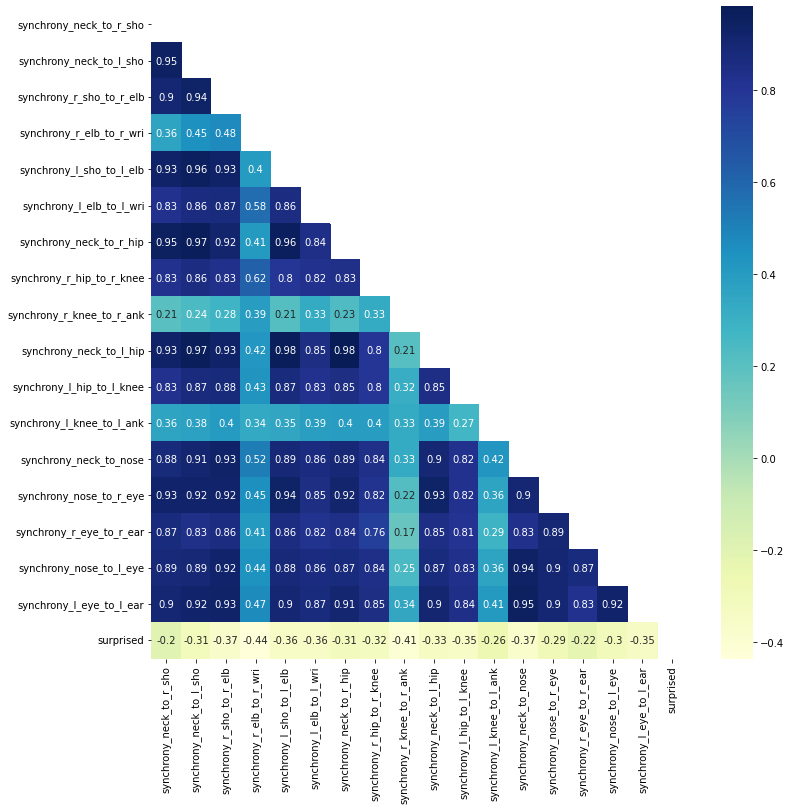

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))  
mask = np.triu(np.ones_like(jazz_fer_ent_s.corr()))
dataplot = sns.heatmap(jazz_fer_ent_s.corr(), cmap="YlGnBu", annot=True, mask=mask, ax=ax)
plt.show()

Disgusted Correlation

In [ ]:
jazz_fer_ent_d = jazz_fer_ent.drop(['timestamp', 'normalized_distance', 'angry', 'fearful', 'happy', 'neutral', 'sad', 'surprised'], axis = 1)

In [ ]:
jazz_fer_ent_d.corr()

,synchrony_neck_to_r_sho,synchrony_neck_to_l_sho,synchrony_r_sho_to_r_elb,synchrony_r_elb_to_r_wri,synchrony_l_sho_to_l_elb,synchrony_l_elb_to_l_wri,synchrony_neck_to_r_hip,synchrony_r_hip_to_r_knee,synchrony_r_knee_to_r_ank,synchrony_neck_to_l_hip,synchrony_l_hip_to_l_knee,synchrony_l_knee_to_l_ank,synchrony_neck_to_nose,synchrony_nose_to_r_eye,synchrony_r_eye_to_r_ear,synchrony_nose_to_l_eye,synchrony_l_eye_to_l_ear,disgusted
synchrony_neck_to_r_sho,1.000000,0.945380,0.901371,0.356791,0.930446,0.826405,0.950877,0.825116,0.205065,0.930941,0.825824,0.360077,0.878332,0.925784,0.873770,0.887492,0.900855,-0.252136
synchrony_neck_to_l_sho,0.945380,1.000000,0.935285,0.448830,0.958296,0.861928,0.966988,0.856284,0.240262,0.965423,0.867369,0.377687,0.912189,0.922417,0.834248,0.888777,0.923419,-0.378627
synchrony_r_sho_to_r_elb,0.901371,0.935285,1.000000,0.475778,0.930915,0.874496,0.917952,0.830009,0.282290,0.926487,0.879292,0.402398,0.929213,0.922715,0.858252,0.922850,0.928752,-0.361293
synchrony_r_elb_to_r_wri,0.356791,0.448830,0.475778,1.000000,0.402509,0.575780,0.405893,0.619336,0.391486,0.418310,0.430426,0.337724,0.517284,0.450655,0.408566,0.439597,0.469457,-0.409841
synchrony_l_sho_to_l_elb,0.930446,0.958296,0.930915,0.402509,1.000000,0.857324,0.962333,0.796874,0.211780,0.976025,0.871631,0.354743,0.888873,0.935014,0.857253,0.882632,0.903710,-0.409187
synchrony_l_elb_to_l_wri,0.826405,0.861928,0.874496,0.575780,0.857324,1.000000,0.840183,0.824779,0.330216,0.850496,0.825027,0.386700,0.864426,0.850621,0.820001,0.862609,0.874408,-0.413915
synchrony_neck_to_r_hip,0.950877,0.966988,0.917952,0.405893,0.962333,0.840183,1.000000,0.834927,0.231085,0.981810,0.850012,0.399433,0.891366,0.917690,0.841066,0.874664,0.906146,-0.396098
synchrony_r_hip_to_r_knee,0.825116,0.856284,0.830009,0.619336,0.796874,0.824779,0.834927,1.000000,0.328556,0.798886,0.798651,0.397973,0.835925,0.819750,0.755929,0.839625,0.853927,-0.353331
synchrony_r_knee_to_r_ank,0.205065,0.240262,0.282290,0.391486,0.211780,0.330216,0.231085,0.328556,1.000000,0.208258,0.315228,0.331482,0.329880,0.218909,0.166323,0.247555,0.339508,-0.508423
synchrony_neck_to_l_hip,0.930941,0.965423,0.926487,0.418310,0.976025,0.850496,0.981810,0.798886,0.208258,1.000000,0.846719,0.392658,0.896935,0.932382,0.845033,0.871176,0.904947,-0.400513


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_d['synchrony_neck_to_r_sho'], jazz_fer_ent_d['disgusted'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.252
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_d['synchrony_neck_to_l_sho'], jazz_fer_ent_d['disgusted'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.379
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_d['synchrony_r_sho_to_r_elb'], jazz_fer_ent_d['disgusted'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.361
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_d['synchrony_r_elb_to_r_wri'], jazz_fer_ent_d['disgusted'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.410
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_d['synchrony_l_sho_to_l_elb'], jazz_fer_ent_d['disgusted'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.409
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_d['synchrony_l_elb_to_l_wri'], jazz_fer_ent_d['disgusted'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.414
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_d['synchrony_neck_to_r_hip'], jazz_fer_ent_d['disgusted'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.396
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_d['synchrony_r_hip_to_r_knee'], jazz_fer_ent_d['disgusted'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.353
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_d['synchrony_r_knee_to_r_ank'], jazz_fer_ent_d['disgusted'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.508
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_d['synchrony_neck_to_l_hip'], jazz_fer_ent_d['disgusted'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.401
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_d['synchrony_l_hip_to_l_knee'], jazz_fer_ent_d['disgusted'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.394
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_d['synchrony_l_knee_to_l_ank'], jazz_fer_ent_d['disgusted'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.346
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_d['synchrony_neck_to_nose'], jazz_fer_ent_d['disgusted'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.425
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_d['synchrony_nose_to_r_eye'], jazz_fer_ent_d['disgusted'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.327
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_d['synchrony_r_eye_to_r_ear'], jazz_fer_ent_d['disgusted'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.310
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_d['synchrony_nose_to_l_eye'], jazz_fer_ent_d['disgusted'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.315
Significance Value: 0.000


In [ ]:
corr, sig = pearsonr(jazz_fer_ent_d['synchrony_l_eye_to_l_ear'], jazz_fer_ent_d['disgusted'])
print('Pearsons correlation: %.3f' %corr)
print('Significance Value: %.3f' %sig)

Pearsons correlation: -0.392
Significance Value: 0.000


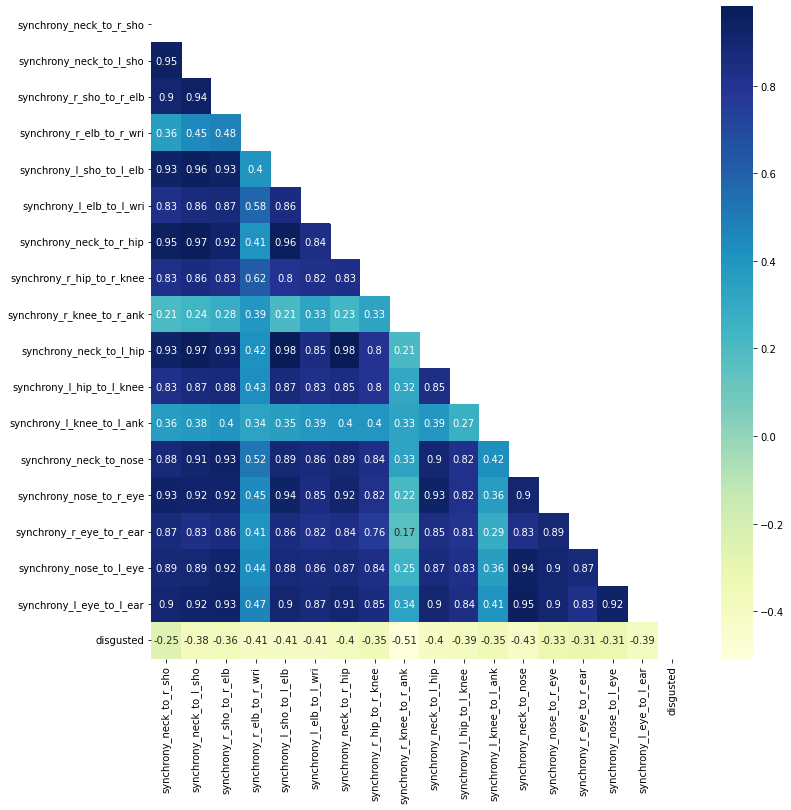

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))  
mask = np.triu(np.ones_like(jazz_fer_ent_d.corr()))
dataplot = sns.heatmap(jazz_fer_ent_d.corr(), cmap="YlGnBu", annot=True, mask=mask, ax=ax)
plt.show()